![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope Extremes-DT Feature Extraction Country cut out example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [4]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [11]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [6]:
countries = ["France", "Italy", "Spain"] # List of countries
shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e7)

In [7]:
request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": "-14",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "165/167",
    "step": "1",
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

In [ ]:
data_file = "data/extremes-dt-earthkit-example-fe-country.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [10]:
# Convert data to xarray
da = data.to_xarray()
da

<xarray.Dataset> Size: 3MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 64405)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-07-06T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 1
  * points     (points) int64 515kB 0 1 2 3 4 ... 64400 64401 64402 64403 64404
    latitude   (points) float64 515kB 35.98 35.98 35.98 ... 51.09 51.13 51.13
    longitude  (points) float64 515kB 354.5 354.5 354.6 ... 2.511 2.432 2.514
    levelist   (points) float64 515kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 515kB 3.422 ... 9.378
    2t         (datetimes, number, steps, points) float64 515kB 293.9 ... 291.4
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-07-06T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           1
    stream:         oper
    type:           fc
    number:         0
    date:           2025-07-06T00:00:00Z

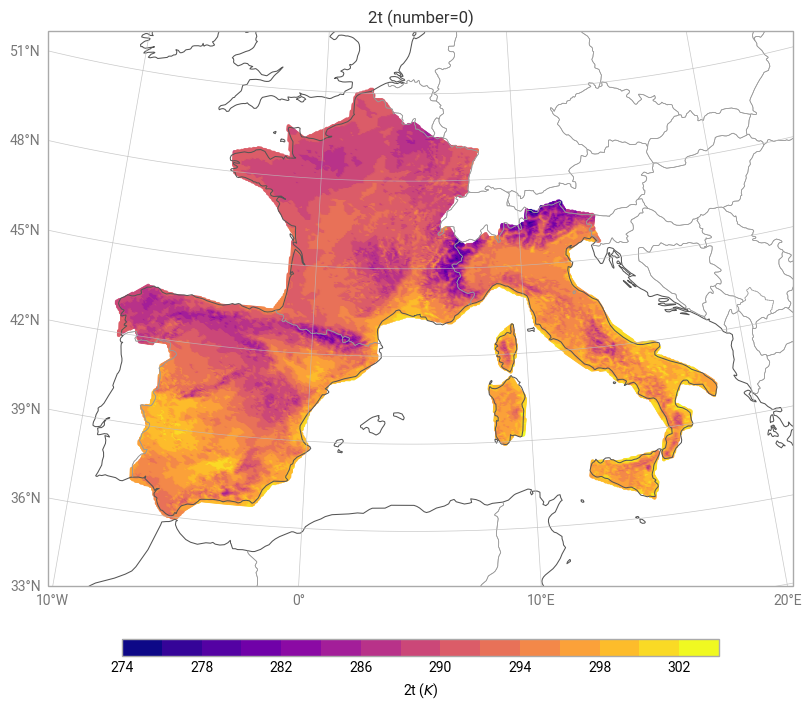

In [5]:
chart = earthkit.plots.Map(domain=countries)
chart.point_cloud(
    da['2t'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()